<a href="https://colab.research.google.com/github/nsthomp5/MAT422/blob/main/MAT_422_HW_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
# Name: Nicholas Thompson
# ID: 1223100502
# Class: MAT 422
# Assignment: HW 3.2

In [39]:
import sympy as sp
import numpy as np
import math
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

Continuity of a function can be most intuitively described as when you draw the curve without taking the pen off the paper. The definition of a limit using delta-epsilon is closely related to the definition of continuity, as continuity at a point is defined by the limit of the function approaching that point being the same from both sides. The epsilon definition for a limit implies that the distance between the function points and the limit stays below any arbitrary positive number. The delta-epsilon definition for continuity follows from the definition for a limit, but that the function output distance depends on the function input distance. A function is continuous if it is continuous at all points within its domain. A stronger connotation is uniform continuity, where the delta-epsilon definition uses the same delta for any 2 points in the domain of the function. Uniform continuity is used to conclude existence and uniqueness of solutions to differential equations.

In [40]:
# 3.2.1 Limits and Continuity
# Example 1: Checking Continuity

def continuity_check (f, c):
  x = sp.symbols('x') # sympy notation
  f_c = f.subs(x, c) # substitute point c into f
  f_c_limit = sp.limit(f, x, c) # find the limit of f at point c
  if f_c == f_c_limit: # check for continuity with the limit definition
    print(f'The function f(x) = {f} is continuous at x = ' + str(c))
  else:
    print(f'The function f(x) = {f} is not continuous at x = ' + str(c))

x = sp.symbols('x')
f = 1/3*x**3
c = 0
continuity_check(f, c)

f = sp.tan(x)
c = sp.pi/2 # f goes to infinity with asymptote pi/2
continuity_check(f, c)



The function f(x) = 0.333333333333333*x**3 is continuous at x = 0
The function f(x) = tan(x) is not continuous at x = pi/2


The derivative of a function at a point is the slope of the function at that point. The derivative of a function as a whole can also be expressed as a function. Derivatives are used to express rate of change, which can be applied to almost any quantitative field. Partial derivatives take the derivative with respect to only one variable, treating all others as constants. Directional derivatives take the derivative in a vector direction. Further applications of derivatives within calculus and differential equations include Jacobian matrices, where dynamical systems can be linearized using partial derivatives to determine if the critical points of the system are stable or unstable. Directional derivatives are used in multivariable calculus to understand rate of change in a 3-or-more-dimensional space with multiple variables at play. The gradient is an application of this, with partial derivatives for all variables of interest taken, and this is where gradient descent, a machine learning algorithm for training a model, is derived from. A Taylor series uses derivatives to approximate functions, which is most applicable when a function that cannot be integrated needs to be approximated at a specific value or interval.

In [41]:
# 3.2.2 Derivatives
# Example 1: Derivative of a Function

f = x**2
f_prime = sp.diff(f, x)
print(f_prime) # symbolic representation

f = sp.exp(5*x) # chain rule
f_prime = sp.diff(f, x)
print(f_prime)

f = sp.sin(3*x) # chain rule
f_prime = sp.diff(f, x)
print(f_prime)



2*x
5*exp(5*x)
3*cos(3*x)


In [42]:
# Example 2: Taylor Series Approximation

print("Using NumPy, e^3 = " + str(np.exp(3))) # numpy computation

approx = 1 + 3 + 3**2/2 + 3**3/6 + 3**4/24 + 3**5/120 + 3**6/720 # manual Taylor Series approximation
print("A manual Taylor series approximation for e^3 = " +str(approx))
print("A SymPy Taylor series approximation for e^x about x = 3 is " + str(sp.series(sp.exp(x), x, 3))) # SymPy Taylor Series expansion

Using NumPy, e^3 = 20.085536923187668
A manual Taylor series approximation for e^3 = 19.412499999999998
A SymPy Taylor series approximation for e^x about x = 3 is exp(3) + (x - 3)*exp(3) + (x - 3)**2*exp(3)/2 + (x - 3)**3*exp(3)/6 + (x - 3)**4*exp(3)/24 + (x - 3)**5*exp(3)/120 + O((x - 3)**6, (x, 3))


In [43]:
# Example 3: Stability

def check_stability(x_prime, y_prime, x0, y0):
  x = sp.symbols('x') # local assignment using sympy notation
  y = sp.symbols('y')
  jacobian = sp.Matrix([[sp.diff(x_prime, x), sp.diff(x_prime, y)], [sp.diff(y_prime, x), sp.diff(y_prime, y)]]) # Partial derivatives with respect to x and y for both equations in the system
  jacobian = jacobian.subs([(x, x0), (y, y0)]) # Substitute the critical point into the Jacobian
  eigenvalues = jacobian.eigenvals() # Find the eigenvalues to determine stability
  print("The eigenvalues of the Jacobian evaluated at the critical point are " + str(eigenvalues))


x = sp.symbols('x') # local assignment using sympy notation
y = sp.symbols('y')

x_prime = x**2 + y + 1
y_prime = .5*x + .5*y

x0 = 1 # Critical Point (1, -1): Where x'=0 and y'=0 simultaneously
y0 = -1


check_stability(x_prime, y_prime, x0, y0) # Unstable: At least one eigenvalue has a positive real part

x_prime = 3*x**2 + y + 3
y_prime = 2*x

x0 = 0
y0 = -3

check_stability(x_prime, y_prime, x0, y0) # Unstable: At least one eigenvalue has a positive real part





The eigenvalues of the Jacobian evaluated at the critical point are {2.28077640640441: 1, 0.219223593595585: 1}
The eigenvalues of the Jacobian evaluated at the critical point are {-sqrt(2): 1, sqrt(2): 1}


Taylor's Theorem is used to approximate functions using the sum  of orders of derivatives expanded with a factorial denominator. An example was already shown for the exponential function, but it applies to any differentiable function and is best used for approximating a function during a small interval.

A SymPy Taylor series approximation for sin(3x) about x = 0 is 3*x - 9*x**3/2 + 81*x**5/40 + O(x**6)


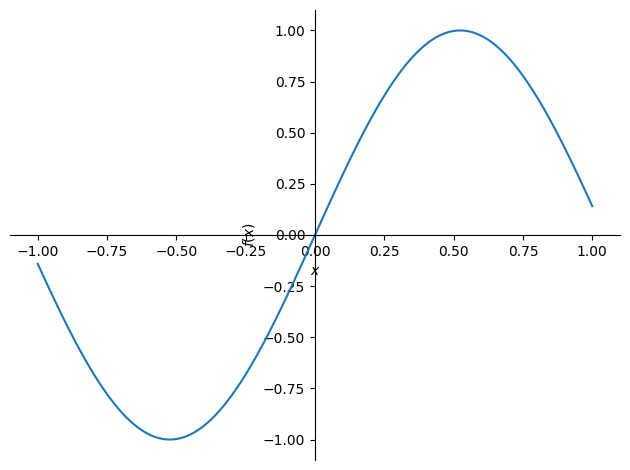

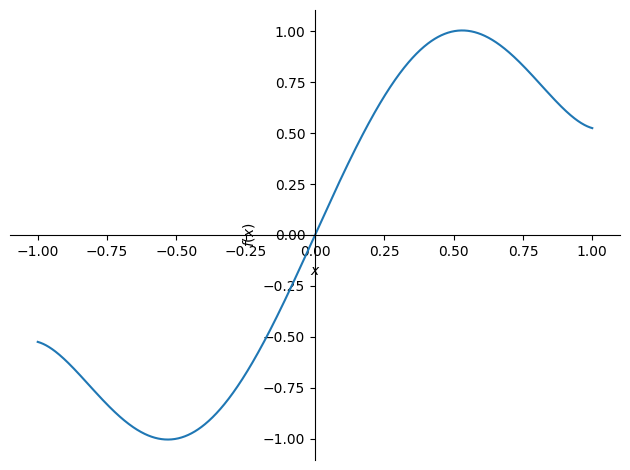

In [44]:
# 3.2.3 Taylor's Theorem
# Example 1: Sine Function

print("A SymPy Taylor series approximation for sin(3x) about x = 0 is " + str(sp.series(sp.sin(3*x), x, 0))) # Symbolic representation of Taylor Series Expansion



sp.plot(sp.sin(3*x), (x, -1, 1)) # Plot of sin(3x)
sp.plot(3*x - 9*x**3/2 + 81*x**5/40, (x, -1, 1)) # Plot of Taylor Approximation about x = 0